<a href="https://colab.research.google.com/github/ConstanzaRB/Trabajo-Final-Finanzas-lll/blob/main/Trabajo_Final_Finanzas_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo Final Finanzas III**

Integrantes: Macarena Ramos, Constanza Rodriguez, Marcelo Tiznado y Maura Zu√±iga

Realizar valoraciones a distintos tipos de activos financieros:

1- Bonos

2- Acciones

3- Futuros

4- Forward

5- Opciones

6- Swaps

7- Fra

8- Otro instrumento financiero



Estructura del trabajo:

1-
. El trabajo debe ser realizado en el sitio web de colaboratory de Python y
debe contener los c√≥digos y librer√≠as necesarias para que ejecute la valoraci√≥n
de cada uno de los activos descritos anteriormente. Para esto puede utilizar
un ejemplo o ejercicio del libro o bien ocupar un ejercicio de la clase.
Son 7 tipos de activos financieros (1 punto por cada activo) y debe mostrar los
c√°lculos, gr√°ficas obtenidos y un documento que resuma los datos
(rentabilidades, riesgo, seg√∫n corresponda).


# **1.- Bonos**

**Ejercicio 1: Valoraci√≥n de un Bono Corportivo de Tesla**
Sup√≥n que deseas calcular el valor de un bono emitido por Tesla Inc.. El bono tiene las siguientes caracter√≠sticas:

Valor nominal (
ùëâ
ùëõ
V
n
‚Äã
 ): 1,000 USD

Tasa de cup√≥n (
ùê∂
C): 5.3% anual

Fecha de emisi√≥n: 18 de agosto de 2017

Fecha de vencimiento: 15 de agosto de 2025

Frecuencia de pagos de cupones: Semestral (dos pagos al a√±o)

Precio actual del bono (
ùëÉ
0
‚Äã
 ): 1,026.40 USD (seg√∫n datos hist√≥ricos)

Tasa de descuento (
ùëü
r): 5% anual (tasa de rendimiento requerida en el mercado)

A√±os restantes hasta el vencimiento: 4 a√±os

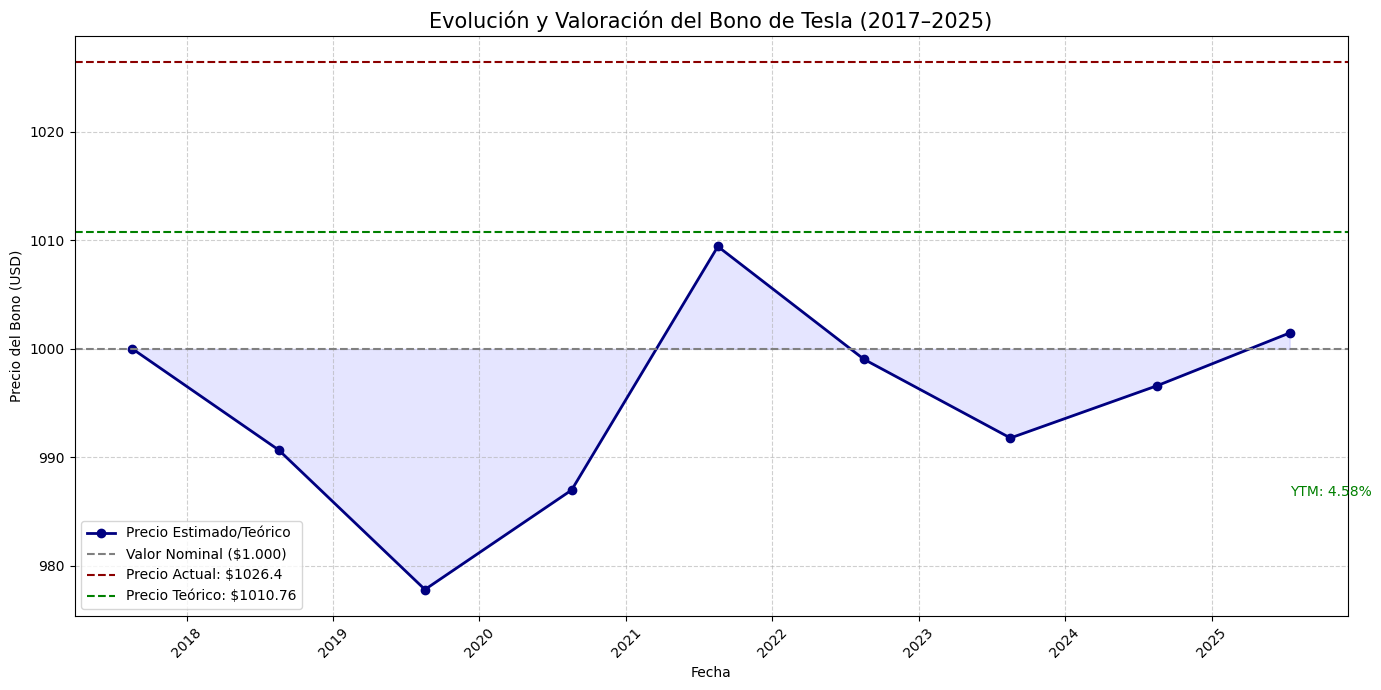


 Resumen Financiero del Bono Tesla:
 Precio Actual  Precio Te√≥rico  Current Yield (%)  YTM Aproximado (%)
        1026.4     1010.755206           5.163679             4.57955

An√°lisis del bono:
El precio te√≥rico del bono, calculado con una tasa de descuento del 5%, es de $1010.76.
El precio actual de mercado es de $1026.40, lo que indica que el bono se encuentra ligeramente sobrevalorado respecto a su valor intr√≠nseco.
El rendimiento corriente (CY) es de 5.16%, mientras que el rendimiento al vencimiento (YTM) aproximado es de 4.58%.
La comparaci√≥n entre estos indicadores sugiere que, a pesar de su precio sobre par, el bono sigue ofreciendo un retorno competitivo.
Visualmente, la curva muestra c√≥mo el precio del bono converge hacia su valor nominal a medida que se acerca el vencimiento en 2025.


In [ ]:
# Instalar librer√≠as necesarias si no est√°n instaladas
!pip install matplotlib pandas numpy

# Importar librer√≠as
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# ------------------------
# PARTE 1: PAR√ÅMETROS DEL BONO
# ------------------------

valor_nominal = 1000                     # Valor nominal del bono
tasa_cupon = 0.053                       # Tasa de cup√≥n anual (5.3%)
frecuencia_pago = 2                      # Semestral
cupon = valor_nominal * tasa_cupon / frecuencia_pago
precio_actual_bono = 1026.40            # Precio actual en el mercado
anos_restantes = 4
tasa_descuento = 0.05                   # Tasa de descuento (5% anual)
n = anos_restantes * frecuencia_pago    # N√∫mero de pagos restantes

# ------------------------
# PARTE 2: C√ÅLCULO DEL PRECIO TE√ìRICO
# ------------------------

flujos_cupon = np.array([cupon / (1 + tasa_descuento / frecuencia_pago)**i for i in range(1, n + 1)])
valor_presente_vn = valor_nominal / (1 + tasa_descuento / frecuencia_pago)**n
precio_teorico_bono = np.sum(flujos_cupon) + valor_presente_vn

# ------------------------
# PARTE 3: INDICADORES FINANCIEROS
# ------------------------

ytm_aprox = frecuencia_pago * (cupon + (valor_nominal - precio_actual_bono) / n) / ((valor_nominal + precio_actual_bono) / 2)
cy = (cupon * frecuencia_pago) / precio_actual_bono

# ------------------------
# PARTE 4: SIMULACI√ìN DE PRECIOS EN EL TIEMPO
# ------------------------

fechas = pd.to_datetime(['2017-08-18', '2018-08-18', '2019-08-18', '2020-08-18',
                         '2021-08-18', '2022-08-18', '2023-08-18', '2024-08-18', '2025-07-15'])

tasas_estimadas = [0.053, 0.058, 0.065, 0.060, 0.048, 0.055, 0.070, 0.060, tasa_descuento]
precios_est = []

for i, r in enumerate(tasas_estimadas):
    n_restantes = max(1, (len(tasas_estimadas) - i) * frecuencia_pago // len(tasas_estimadas) * anos_restantes)
    pagos = [cupon / (1 + r / frecuencia_pago)**t for t in range(1, n_restantes + 1)]
    valor_final = valor_nominal / (1 + r / frecuencia_pago)**n_restantes
    precios_est.append(sum(pagos) + valor_final)

df = pd.DataFrame({
    'Fecha': fechas,
    'Precio Estimado del Bono': precios_est
})

# ------------------------
# PARTE 5: TABLA DE RESUMEN
# ------------------------

resumen = pd.DataFrame({
    'Precio Actual': [precio_actual_bono],
    'Precio Te√≥rico': [precio_teorico_bono],
    'Current Yield (%)': [cy * 100],
    'YTM Aproximado (%)': [ytm_aprox * 100]
})

# ------------------------
# PARTE 6: GR√ÅFICO DEL BONO
# ------------------------

plt.figure(figsize=(14, 7))
plt.plot(df['Fecha'], df['Precio Estimado del Bono'], color='navy', marker='o', linewidth=2, label='Precio Estimado/Te√≥rico')
plt.axhline(y=valor_nominal, color='gray', linestyle='--', label='Valor Nominal ($1.000)')
plt.axhline(y=precio_actual_bono, color='darkred', linestyle='--', label=f'Precio Actual: ${precio_actual_bono}')
plt.axhline(y=precio_teorico_bono, color='green', linestyle='--', label=f'Precio Te√≥rico: ${precio_teorico_bono:.2f}')
plt.fill_between(df['Fecha'], df['Precio Estimado del Bono'], valor_nominal, color='blue', alpha=0.1)

plt.annotate(f"CY: {cy*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono + 15), color='darkred', fontsize=10)
plt.annotate(f"YTM: {ytm_aprox*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono - 40), color='green', fontsize=10)

plt.title('Evoluci√≥n y Valoraci√≥n del Bono de Tesla (2017‚Äì2025)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Precio del Bono (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------
# PARTE 7: MOSTRAR TABLA Y AN√ÅLISIS
# ------------------------

print("\n Resumen Financiero del Bono Tesla:")
print(resumen.to_string(index=False))

print("\nAn√°lisis del bono:")
print(f"El precio te√≥rico del bono, calculado con una tasa de descuento del 5%, es de ${precio_teorico_bono:.2f}.")
print(f"El precio actual de mercado es de ${precio_actual_bono:.2f}, lo que indica que el bono se encuentra ligeramente sobrevalorado respecto a su valor intr√≠nseco.")
print(f"El rendimiento corriente (CY) es de {cy*100:.2f}%, mientras que el rendimiento al vencimiento (YTM) aproximado es de {ytm_aprox*100:.2f}%.")
print("La comparaci√≥n entre estos indicadores sugiere que, a pesar de su precio sobre par, el bono sigue ofreciendo un retorno competitivo.")
print("Visualmente, la curva muestra c√≥mo el precio del bono converge hacia su valor nominal a medida que se acerca el vencimiento en 2025.")


# **2.- Acciones**

Calcular y analizar la rentabilidad y el riesgo de la acci√≥n de Google (GOOG) durante los √∫ltimos 5 a√±os con frecuencia semanal, bas√°ndose en datos hist√≥ricos. Se debe visualizar el comportamiento del precio de la acci√≥n, rentabilidad, desviaci√≥n est√°ndar o riesgo. En el gr√°fico, debe incluir medias m√≥viles y los puntos m√°ximos y m√≠nimos del periodo.

/tmp/ipython-input-33-2202980246.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="5y", interval="1wk")
[*********************100%***********************]  1 of 1 completed


Ticker       Close        High         Low        Open     Volume  \
Date                                                                           
2020-07-13   GOOG   75.329727   75.721897   73.876368   74.556825   59520000   
2020-07-20   GOOG   75.146812   78.880622   73.980247   75.315313  137542000   
2020-07-27   GOOG   73.709854   76.593212   72.271899   75.332207  183320000   
2020-08-03   GOOG   74.282951   75.394091   72.501541   73.892769  195728000   
2020-08-10   GOOG   74.941048   76.408332   73.218787   73.919623  139814000   
...           ...         ...         ...         ...         ...        ...   
2025-06-16   GOOG  167.729996  178.714996  166.270004  175.904999  123723000   
2025-06-23   GOOG  178.270004  178.839996  163.330002  167.320007  187875500   
2025-06-30   GOOG  180.550003  181.580002  174.660004  180.785004  102356400   
2025-07-07   GOOG  181.309998  182.610001  173.880005  180.134995  125057400   
2025-07-14   GOOG  183.770004  185.410004  180.710999  182.070007   65908962   

            Rentabilidad  
Date                      
2020-07-13           NaN  
2020-07-20     -0.002428  
2020-07-27     -0.019122  
2020-08-03      0.007775  
2020-08-10      0.008859  
...                  ...  
2025-06-16     -0.045192  
2025-06-23      0.062839  
2025-06-30      0.012790  
2025-07-07      0.004209  
2025-07-14      0.013568  

[262 rows x 7 columns]

Rentabilidad Promedio (%)  Riesgo (Desviaci√≥n Est√°ndar %)
0                   0.429786                        4.211116


Rentabilidad Promedio: La rentabilidad promedio de la acci√≥n es 0.430%, lo que indica que, en promedio, el valor de la acci√≥n ha subido un 0.430% semanalmente durante los √∫ltimos 5 a√±os. Este dato sugiere que la acci√≥n ha tenido un rendimiento positivo, aunque con fluctuaciones.

Desviaci√≥n Est√°ndar (Riesgo): El riesgo de la acci√≥n es 4.211%, lo que indica que los precios de la acci√≥n tienen una volatilidad moderada. Un valor m√°s alto significar√≠a que los precios var√≠an m√°s, lo que implica mayor incertidumbre para los inversores.


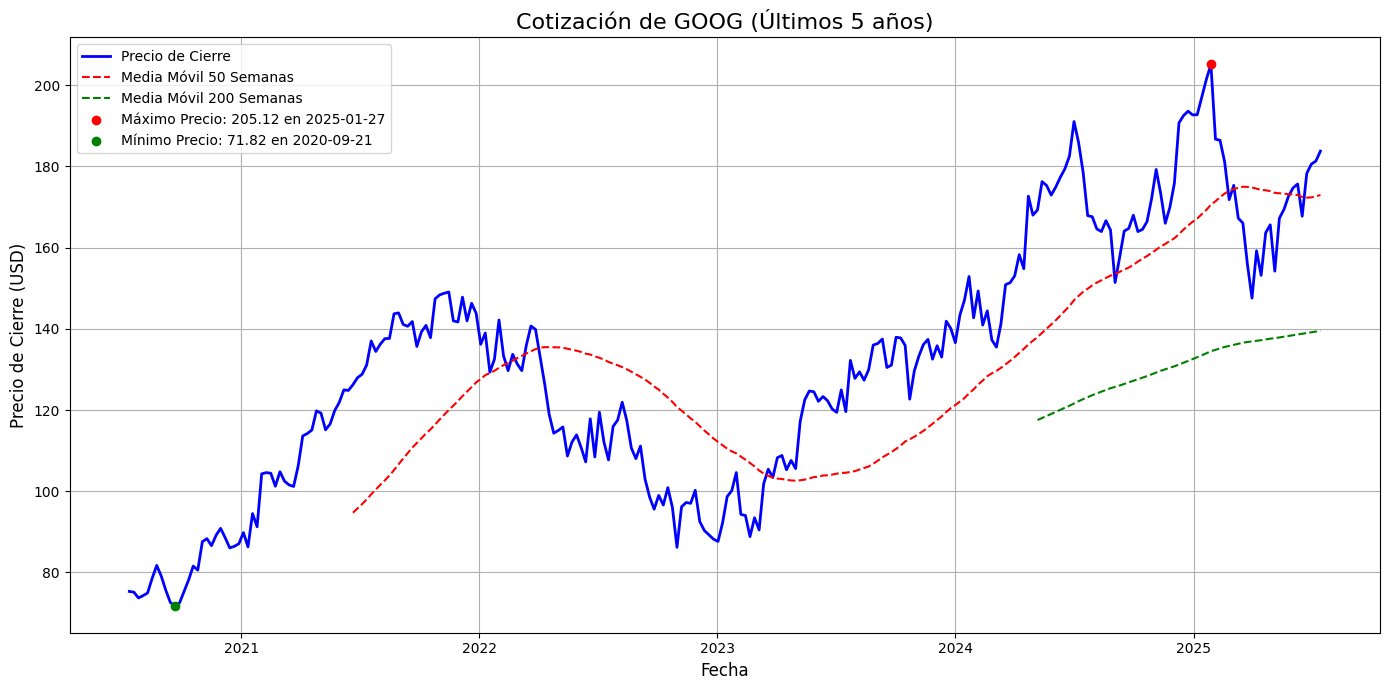


Comportamiento de la acci√≥n:
El gr√°fico muestra una tendencia creciente en el precio de cierre de Google (GOOG) durante los √∫ltimos 5 a√±os, especialmente desde 2020, lo que sugiere un crecimiento impulsado por el √©xito en √°reas como tecnolog√≠a, publicidad y la nube.

Medias M√≥viles:
La MMA50 (l√≠nea roja) indica la tendencia a corto plazo y sugiere un momento alcista cuando est√° por encima del precio de cierre. La MMA200 (l√≠nea verde) refleja la tendencia a largo plazo, y un precio por encima de ella indica una tendencia positiva.

Puntos m√°ximos y m√≠nimos:
El punto m√°ximo (rojo) ocurri√≥ el 2025-01-27 con 205.12 USD, posiblemente impulsado por un evento positivo.
El punto m√≠nimo (verde) fue el 2020-09-21 con 71.82 USD, afectado probablemente por la pandemia de COVID-19.


In [ ]:
#2.- Acciones

 # Instalar yfinance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Elegir y Descargar los datos de los √∫ltimos 5 a√±os con frecuencia semanal
ticker = "GOOG"
data = yf.download(ticker, period="5y", interval="1wk")

# Calcular la rentabilidad con los precios de cierre.
data['Rentabilidad'] = data['Close'].pct_change()
# Crear una tabla con m√°s detalles (precios de cierre, m√°ximos, m√≠nimos, etc.)
tabla = pd.concat([data['Close'], data['High'], data['Low'], data['Open'], data['Volume'], data['Rentabilidad']], axis=1)
tabla.columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'Rentabilidad']
tabla['Ticker'] = ticker
tabla = tabla[['Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'Rentabilidad']]

display(tabla)

# Realizar un resumen de la rentabilidad promedio y con su respectivo riesgo (desviaci√≥n est√°ndar).
rentabilidad_promedio = data['Rentabilidad'].mean()
riesgo = data['Rentabilidad'].std()

# Resumen
resumen = pd.DataFrame({
    'Rentabilidad Promedio (%)': [rentabilidad_promedio * 100],
    'Riesgo (Desviaci√≥n Est√°ndar %)': [riesgo * 100]
})

display(resumen)

#Explicaci√≥n de rentabilidad y riesgo
print("\nRentabilidad Promedio: La rentabilidad promedio de la acci√≥n es {:.3f}%, lo que indica que, en promedio, el valor de la acci√≥n ha subido un {:.3f}% semanalmente durante los √∫ltimos 5 a√±os. Este dato sugiere que la acci√≥n ha tenido un rendimiento positivo, aunque con fluctuaciones.".format(rentabilidad_promedio * 100, rentabilidad_promedio * 100))
print("\nDesviaci√≥n Est√°ndar (Riesgo): El riesgo de la acci√≥n es {:.3f}%, lo que indica que los precios de la acci√≥n tienen una volatilidad moderada. Un valor m√°s alto significar√≠a que los precios var√≠an m√°s, lo que implica mayor incertidumbre para los inversores.".format(riesgo * 100))

# 5. Graficar la cotizaci√≥n del periodo se√±alado (en un gr√°fico de l√≠nea con los precios de cierre).
plt.figure(figsize=(14, 7))

# Graficar los precios de cierre
plt.plot(data['Close'], label='Precio de Cierre', color='b', linewidth=2)

# A√±adir una media m√≥vil de 50 semanas
data['SMA50'] = data['Close'].rolling(window=50).mean()
plt.plot(data['SMA50'], label='Media M√≥vil 50 Semanas', linestyle='--', color='r')

# A√±adir una media m√≥vil de 200 semanas
data['SMA200'] = data['Close'].rolling(window=200).mean()
plt.plot(data['SMA200'], label='Media M√≥vil 200 Semanas', linestyle='--', color='g')

# Obtener el precio m√°ximo y m√≠nimo y sus respectivas fechas
max_price = data['Close'].max()
min_price = data['Close'].min()

# Obtener las fechas correspondientes al m√°ximo y m√≠nimo (en formato datetime)
max_date = data['Close'].idxmax()  # El √≠ndice de la fecha con el precio m√°ximo
min_date = data['Close'].idxmin()  # El √≠ndice de la fecha con el precio m√≠nimo

# Asegurarnos de que las fechas sean valores individuales y no series
max_date_scalar = max_date.iloc[0]
min_date_scalar = min_date.iloc[0]

max_price_scalar = max_price.iloc[0]
min_price_scalar = min_price.iloc[0]

max_date_str = max_date_scalar.strftime('%Y-%m-%d')
min_date_str = min_date_scalar.strftime('%Y-%m-%d')


# Graficar los precios m√°ximos y m√≠nimos con etiquetas
plt.scatter(max_date_scalar, max_price_scalar, color='red', zorder=5, label=f'M√°ximo Precio: {max_price_scalar:.2f} en {max_date_str}')
plt.scatter(min_date_scalar, min_price_scalar, color='green', zorder=5, label=f'M√≠nimo Precio: {min_price_scalar:.2f} en {min_date_str}')

# A√±adir t√≠tulo, etiquetas y leyenda
plt.title(f'Cotizaci√≥n de {ticker} (√öltimos 5 a√±os)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

# Imprimir la explicaci√≥n del gr√°fico
print("\nComportamiento de la acci√≥n:")
print("El gr√°fico muestra una tendencia creciente en el precio de cierre de Google (GOOG) durante los √∫ltimos 5 a√±os, especialmente desde 2020, lo que sugiere un crecimiento impulsado por el √©xito en √°reas como tecnolog√≠a, publicidad y la nube.")
print("\nMedias M√≥viles:")
print("La MMA50 (l√≠nea roja) indica la tendencia a corto plazo y sugiere un momento alcista cuando est√° por encima del precio de cierre. La MMA200 (l√≠nea verde) refleja la tendencia a largo plazo, y un precio por encima de ella indica una tendencia positiva.")
print("\nPuntos m√°ximos y m√≠nimos:")
print(f"El punto m√°ximo (rojo) ocurri√≥ el {max_date_str} con {max_price_scalar:.2f} USD, posiblemente impulsado por un evento positivo.")
print(f"El punto m√≠nimo (verde) fue el {min_date_str} con {min_price_scalar:.2f} USD, afectado probablemente por la pandemia de COVID-19.")

# **3.- Futuros**

Cobertura larga
Hoy es 15 de enero. Un fabricante de cobre sabe que requerir√° 100 mil libras de cobre el 15 de mayo para cumplir con un contrato determinado. El precio spot del cobre es de 3.40 por libra y el precio de futuros de mayo es de 3.20 por libra.

El fabricante de cobre puede cubrir con las transacciones siguientes:
 15 de enero: tomar una posici√≥n larga en cuatro contratos de futuros de cobre de mayo
 15 de mayo: cerrar la posici√≥n

Despu√©s de tomar en cuenta las ganancias o p√©rdidas obtenidas de los contratos de futuros, el precio pagado por la empresa es cercano a $3.20 por libra.

Precio Spot en Mayo (USD por libra)  \
0                                 3.00   
1                                 3.07   
2                                 3.13   
3                                 3.20   
4                                 3.27   
5                                 3.33   
6                                 3.40   
7                                 3.47   
8                                 3.53   
9                                 3.60   

   Ganancia/P√©rdida de la Cobertura en Futuros (USD)  
0                                          -20000.00  
1                                          -13333.33  
2                                           -6666.67  
3                                               0.00  
4                                            6666.67  
5                                           13333.33  
6                                           20000.00  
7                                           26666.67  
8                                           33333.33  
9                                           40000.00


An√°lisis de la Cobertura Larga:
La cobertura larga se realiza comprando futuros a $3.20 por libra. Si el precio spot del cobre en mayo supera los $3.20, el fabricante obtiene ganancias,
y si el precio spot es menor, incurre en p√©rdidas. La tabla a continuaci√≥n muestra c√≥mo se distribuyen las ganancias y p√©rdidas para distintos precios spot.
Cuando el precio spot sube por encima de $3.20, las ganancias aumentan; cuando baja, las p√©rdidas aumentan.
Por lo tanto, esta estrategia proporciona protecci√≥n contra aumentos de precio, pero limita las ganancias cuando los precios caen.


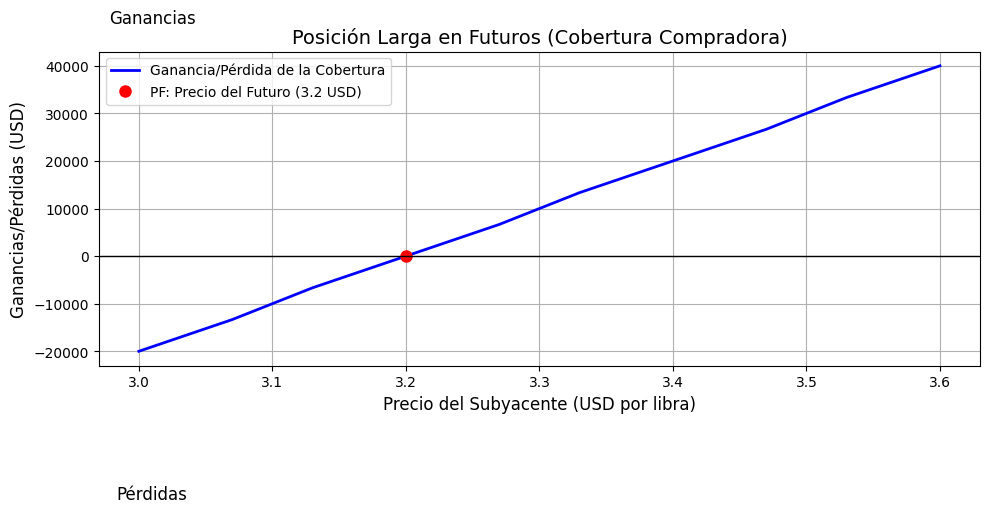


Interpretaci√≥n del gr√°fico:
El gr√°fico muestra c√≥mo las ganancias y p√©rdidas de la cobertura de futuros var√≠an en funci√≥n del precio spot del cobre. La l√≠nea azul indica que a medida que
el precio del cobre en el mercado spot aumenta, las ganancias aumentan proporcionalmente. Por el contrario, si el precio spot disminuye, las p√©rdidas aumentan.
El punto rojo en el gr√°fico representa el precio de futuros acordado, que es de $3.20. Cuando el precio spot est√° por debajo de este valor, el fabricante incurre en p√©rdidas.
Y cuando el precio spot est√° por encima, obtiene ganancias. Esto visualiza c√≥mo la estrategia de cobertura larga protege al fabricante contra las fluctuaciones del mercado.
En resumen, la cobertura en futuros asegura que el precio del cobre pagado sea cercano a $3.20, independientemente de las variaciones en el mercado spot.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos iniciales
precio_futuro_inicial = 3.20  # Precio de futuros en enero (por libra)
precio_spot_enero = 3.40      # Precio spot del cobre en enero (por libra)
cantidad_cobre = 100000       # Cantidad total de cobre requerida (en libras)
contratos_futuro = 4          # N√∫mero de contratos de futuros

# Precio de cada contrato de futuros cubre 25,000 libras de cobre
cantidad_por_contrato = 25000

# Rango de precios spot en mayo (de 3.00 a 3.60 USD por libra)
precios_spot_mayo = np.linspace(3.00, 3.60, 10)

# C√°lculo de las ganancias y p√©rdidas en los contratos de futuros
ganancias_futuros = (precios_spot_mayo - precio_futuro_inicial) * cantidad_cobre

# Redondear los valores a 2 decimales
precios_spot_mayo = np.round(precios_spot_mayo, 2)
ganancias_futuros = np.round(ganancias_futuros, 2)

# Crear DataFrame para los resultados ordenados
tabla_resultados = pd.DataFrame({
    'Precio Spot en Mayo (USD por libra)': precios_spot_mayo,
    'Ganancia/P√©rdida de la Cobertura en Futuros (USD)': ganancias_futuros
})

# Mostrar la tabla de resultados
display(tabla_resultados)

# Interpretaci√≥n de los resultados antes del gr√°fico
print("\nAn√°lisis de la Cobertura Larga:")
print(f"La cobertura larga se realiza comprando futuros a $3.20 por libra. Si el precio spot del cobre en mayo supera los $3.20, el fabricante obtiene ganancias,")
print(f"y si el precio spot es menor, incurre en p√©rdidas. La tabla a continuaci√≥n muestra c√≥mo se distribuyen las ganancias y p√©rdidas para distintos precios spot.")
print(f"Cuando el precio spot sube por encima de $3.20, las ganancias aumentan; cuando baja, las p√©rdidas aumentan.")
print(f"Por lo tanto, esta estrategia proporciona protecci√≥n contra aumentos de precio, pero limita las ganancias cuando los precios caen.")

# Graficamos el gr√°fico de posici√≥n larga en futuros (cobertura compradora)
plt.figure(figsize=(10, 6))

# Graficamos la l√≠nea de ganancia/p√©rdida
plt.plot(precios_spot_mayo, ganancias_futuros, label='Ganancia/P√©rdida de la Cobertura', color='blue', linewidth=2)

# Marcamos el precio de futuros (precio de compra) con un punto rojo en el eje horizontal
plt.plot(precio_futuro_inicial, 0, 'ro', label=f'PF: Precio del Futuro ({precio_futuro_inicial} USD)', markersize=8)

# A√±adimos etiquetas y t√≠tulo
plt.title('Posici√≥n Larga en Futuros (Cobertura Compradora)', fontsize=14)
plt.xlabel('Precio del Subyacente (USD por libra)', fontsize=12)
plt.ylabel('Ganancias/P√©rdidas (USD)', fontsize=12)

# L√≠neas de referencia
plt.axhline(0, color='black', linewidth=1)  # L√≠nea horizontal en 0 para marcar el punto de equilibrio

# Agregar etiquetas a los ejes
plt.text(3.01, 50000, 'Ganancias', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')
plt.text(3.01, -50000, 'P√©rdidas', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')

# Leyenda
plt.legend()

# Ajustar y mostrar el gr√°fico
plt.tight_layout()
plt.grid(True)

# Mostrar el gr√°fico
plt.show()

# Interpretaci√≥n del gr√°fico despu√©s de mostrarlo
print("\nInterpretaci√≥n del gr√°fico:")
print(f"El gr√°fico muestra c√≥mo las ganancias y p√©rdidas de la cobertura de futuros var√≠an en funci√≥n del precio spot del cobre. La l√≠nea azul indica que a medida que")
print(f"el precio del cobre en el mercado spot aumenta, las ganancias aumentan proporcionalmente. Por el contrario, si el precio spot disminuye, las p√©rdidas aumentan.")
print(f"El punto rojo en el gr√°fico representa el precio de futuros acordado, que es de $3.20. Cuando el precio spot est√° por debajo de este valor, el fabricante incurre en p√©rdidas.")
print(f"Y cuando el precio spot est√° por encima, obtiene ganancias. Esto visualiza c√≥mo la estrategia de cobertura larga protege al fabricante contra las fluctuaciones del mercado.")
print(f"En resumen, la cobertura en futuros asegura que el precio del cobre pagado sea cercano a $3.20, independientemente de las variaciones en el mercado spot.")




#**4.- Forward**
**Ejercicio 4: C√°lculo del Precio de un Contrato Forward sobre la acci√≥n de Microsoft Inc.**

Calcular el precio de un contrato Forward sobre la acci√≥n de Microsoft Inc..
Datos disponibles:

Precio spot de la acci√≥n de Microsoft (
ùëÜ
0
S
0
‚Äã
 ): 250 USD

Tasa de inter√©s libre de riesgo (
ùëü): 4% anual

Tiempo hasta el vencimiento (
ùëá): 2 a√±os

Precio spot inicial: 250 USD


Precio Spot (S0): $250.00
Tasa de inter√©s libre de riesgo (r): 4.0%
Tiempo hasta el vencimiento (T): 2 a√±o(s)

El precio a futuro del contrato Forward (F0) es: $270.82
Rentabilidad en posici√≥n larga: 8.33%
Rentabilidad en posici√≥n corta: -8.33%


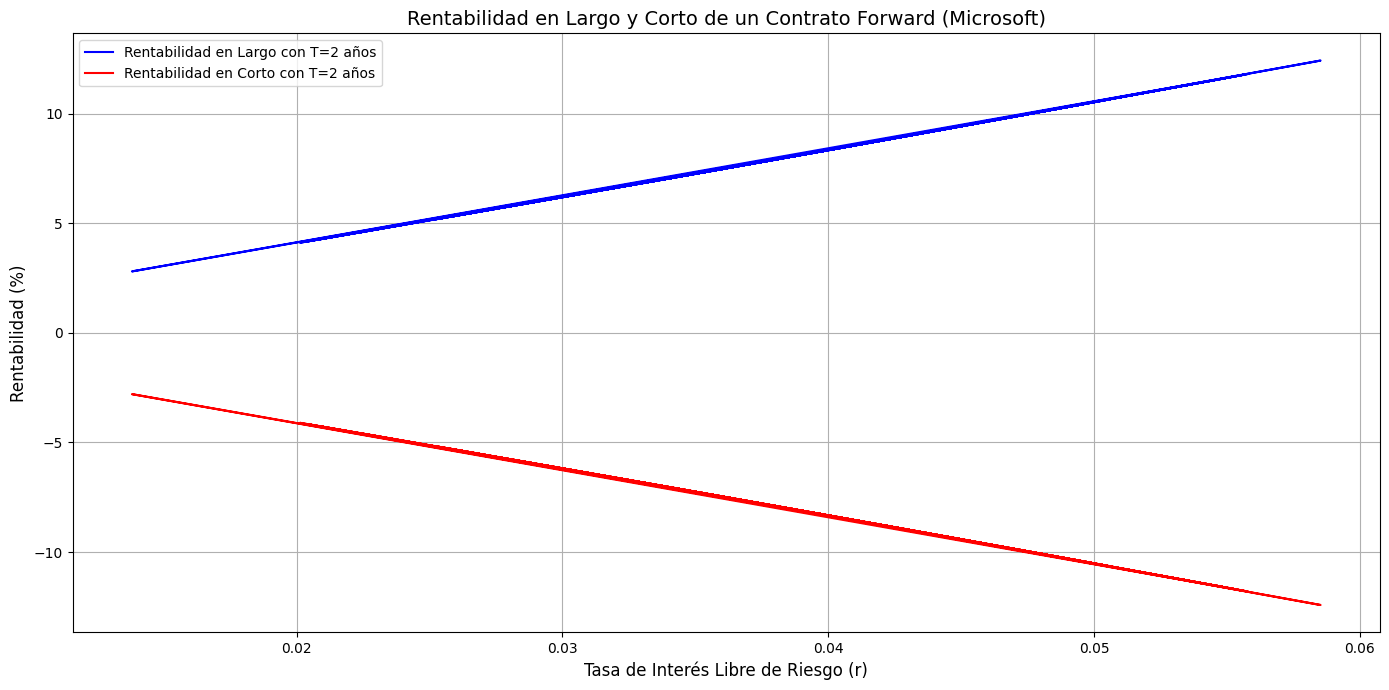


 An√°lisis del Contrato Forward:

El precio a futuro del contrato Forward es $270.82, lo que significa que este es el precio acordado hoy para comprar la acci√≥n de Microsoft en 2 a√±os. Este precio es influenciado por la tasa de inter√©s libre de riesgo y el tiempo hasta el vencimiento del contrato.

An√°lisis de Sensibilidad y Rentabilidad:
En una posici√≥n **larga**, la rentabilidad es positiva y crece a medida que la tasa de inter√©s sube, lo que refleja que el precio Forward aumenta y el inversor obtiene m√°s ganancia si compra el activo ahora y vende a futuro.
En una posici√≥n **corta**, la rentabilidad es negativa, pero crece a medida que la tasa de inter√©s sube, ya que el inversor que vende ahora y compra a futuro ve un precio m√°s bajo, lo que le beneficia si la tasa de inter√©s es m√°s alta.

Este an√°lisis es clave para los inversores que participan en **estrategias de cobertura** o buscan **fijar precios futuros**. La rentabilidad var√≠a dependiendo de si se est√° en una 

In [ ]:
# Instalar librer√≠as necesarias si no est√°n instaladas
!pip install numpy matplotlib pandas

# Importar librer√≠as
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# PAR√ÅMETROS DEL EJERCICIO
# =======================

# Precio spot de la acci√≥n de Microsoft
S0 = 250  # USD

# Tasa de inter√©s libre de riesgo
r = 0.04  # 4% anual

# Tiempo hasta el vencimiento en a√±os
T = 2  # 2 a√±os

# C√°lculo del precio a futuro del contrato Forward (usando la f√≥rmula est√°ndar)
F0 = S0 * np.exp(r * T)

# -------------------------
# RENTABILIDAD EN LARGO Y CORTO
# -------------------------

# Rentabilidad en posici√≥n larga: (F0 - S0) / S0
rentabilidad_largo = (F0 - S0) / S0 * 100

# Rentabilidad en posici√≥n corta: (S0 - F0) / S0
rentabilidad_corto = (S0 - F0) / S0 * 100

# Resultados iniciales
print(f"Precio Spot (S0): ${S0:.2f}")
print(f"Tasa de inter√©s libre de riesgo (r): {r*100}%")
print(f"Tiempo hasta el vencimiento (T): {T} a√±o(s)")
print(f"\nEl precio a futuro del contrato Forward (F0) es: ${F0:.2f}")
print(f"Rentabilidad en posici√≥n larga: {rentabilidad_largo:.2f}%")
print(f"Rentabilidad en posici√≥n corta: {rentabilidad_corto:.2f}%")

# ============================
# AN√ÅLISIS DE SENSIBILIDAD
# ============================

# Vamos a generar la variabilidad en la tasa de inter√©s (r) con fluctuaciones realistas
np.random.seed(42)  # Semilla para reproducibilidad
r_values = 0.04 + np.random.normal(0, 0.01, 100)  # Tasas de inter√©s con ruido (normal) de 1%

# Tiempo hasta el vencimiento
T_values = np.linspace(0.1, 5, 50)  # Tiempos de vencimiento de 0.1 a 5 a√±os

# C√°lculo de precios Forward para variaciones en la tasa de inter√©s (r)
F0_r = S0 * np.exp(r_values * T)  # Precios Forward para diferentes tasas de inter√©s

# ---------------------------
# GR√ÅFICO DE RENTABILIDAD
# ---------------------------

# Rentabilidad en largo y corto para variabilidad de tasa de inter√©s
rentabilidad_largo_r = (F0_r - S0) / S0 * 100
rentabilidad_corto_r = (S0 - F0_r) / S0 * 100

# Crear gr√°fico de rentabilidad
plt.figure(figsize=(14, 7))
plt.plot(r_values, rentabilidad_largo_r, label=f"Rentabilidad en Largo con T={T} a√±os", color='blue')
plt.plot(r_values, rentabilidad_corto_r, label=f"Rentabilidad en Corto con T={T} a√±os", color='red')
plt.title('Rentabilidad en Largo y Corto de un Contrato Forward (Microsoft)', fontsize=14)
plt.xlabel('Tasa de Inter√©s Libre de Riesgo (r)', fontsize=12)
plt.ylabel('Rentabilidad (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# AN√ÅLISIS EXPLICATIVO
# -----------------------

# Generar an√°lisis interpretativo del contrato Forward
print("\n An√°lisis del Contrato Forward:")

# An√°lisis sobre el precio Forward
print(f"\nEl precio a futuro del contrato Forward es ${F0:.2f}, lo que significa que este es el precio acordado hoy para comprar la acci√≥n de Microsoft en 2 a√±os. Este precio es influenciado por la tasa de inter√©s libre de riesgo y el tiempo hasta el vencimiento del contrato.")

# An√°lisis de sensibilidad y rentabilidad
print("\nAn√°lisis de Sensibilidad y Rentabilidad:")
print(f"En una posici√≥n **larga**, la rentabilidad es positiva y crece a medida que la tasa de inter√©s sube, lo que refleja que el precio Forward aumenta y el inversor obtiene m√°s ganancia si compra el activo ahora y vende a futuro.")
print(f"En una posici√≥n **corta**, la rentabilidad es negativa, pero crece a medida que la tasa de inter√©s sube, ya que el inversor que vende ahora y compra a futuro ve un precio m√°s bajo, lo que le beneficia si la tasa de inter√©s es m√°s alta.")
print("\nEste an√°lisis es clave para los inversores que participan en **estrategias de cobertura** o buscan **fijar precios futuros**. La rentabilidad var√≠a dependiendo de si se est√° en una posici√≥n larga o corta, y este comportamiento refleja la relaci√≥n entre tasa de inter√©s y el valor del activo en el futuro.")


# **5.- Opciones**

**Ejercicio 5:**


Un inversionista adquiere una opci√≥n de compra europea para comprar 100 acciones de una empresa.
El precio de ejercicio de la opci√≥n es de 100 USD, y el precio actual de la acci√≥n es de 98 USD.
El costo de la opci√≥n es de 5 USD por acci√≥n, lo que significa que la inversi√≥n inicial es de 500 USD
(100 acciones * 5 USD por acci√≥n).

El inversionista planea ejercer la opci√≥n √∫nicamente si el precio de la acci√≥n al vencimiento es mayor
que el precio de ejercicio de 100 USD. De lo contrario, la opci√≥n no se ejercer√°, y el inversionista perder√°
la inversi√≥n inicial de 500 USD.

Los par√°metros utilizados para calcular el valor te√≥rico de la opci√≥n mediante el modelo de Black-Scholes
son los siguientes:
- Tasa de inter√©s libre de riesgo (r) = 5%
- Volatilidad (œÉ) = 20%
- Tiempo hasta el vencimiento (T) = 4 meses (1/3 a√±os)


Precio de la opci√≥n de compra (Black-Scholes): 4.35 USD


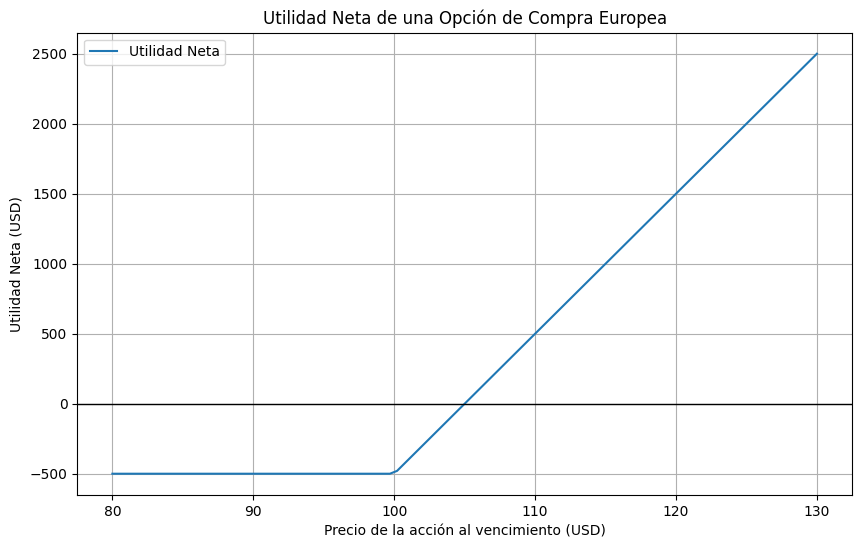

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos del problema
S0 = 98  # Precio actual de la acci√≥n (en USD)
K = 100  # Precio de ejercicio de la opci√≥n (en USD)
T = 1/3  # Tiempo hasta el vencimiento (en a√±os)
sigma = 0.20  # Volatilidad (20%)
r = 0.05  # Tasa de inter√©s libre de riesgo (5%)
precio_opcion = 5  # Precio de la opci√≥n (en USD)

# C√°lculos de Black-Scholes
d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Precio de la opci√≥n de compra seg√∫n Black-Scholes
C = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Imprimir el resultado del precio de la opci√≥n
print(f"Precio de la opci√≥n de compra (Black-Scholes): {C:.2f} USD")

# Generaci√≥n de una gr√°fica para la utilidad neta
# Vamos a evaluar la utilidad neta para distintos precios al vencimiento de la acci√≥n
precios = np.linspace(80, 130, 100)  # Precio de la acci√≥n al vencimiento
utilidad = np.maximum(precios - K, 0) * 100 - 500  # Ganancia neta: (Precio al vencimiento - Precio ejercicio) * 100 - Inversi√≥n inicial

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(precios, utilidad, label='Utilidad Neta')
plt.axhline(0, color='black',linewidth=1)
plt.title('Utilidad Neta de una Opci√≥n de Compra Europea')
plt.xlabel('Precio de la acci√≥n al vencimiento (USD)')
plt.ylabel('Utilidad Neta (USD)')
plt.grid(True)
plt.legend()
plt.show()

# **6.-Swap**

**Ejercicio 6:**

Un swap de tasas de inter√©s de $100 millones tiene una vida restante de 10 meses. Bajo los t√©rminos del swap,
la tasa LIBOR a seis meses se intercambia por una tasa de inter√©s de 7% anual (compuesta semestralmente). El promedio de la tasa de inter√©s de demanda
y oferta que se intercambia por la tasa LIBOR a seis meses en swaps de todos los vencimientos es actualmente de 5% anual con una composici√≥n continua.
La tasa LIBOR a seis meses fue de 4.6% anual hace dos meses.

¬øCu√°l es el valor actual del swap para la parte que paga la tasa variable?
¬øCu√°l es su valor para la parte que paga la tasa fija?

Valor del bono fijo: 102.718 millones
Valor del bono variable: 100.609 millones
Valor del swap para quien paga tasa variable: 2.109 millones
Valor del swap para quien paga tasa fija: -2.109 millones


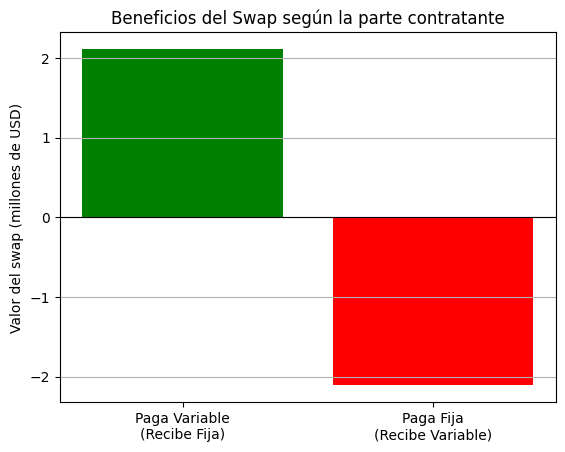

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros
notional = 100  # en millones
fixed_rate = 0.07
libor_prev = 0.046
market_rate = 0.05  # tasa continua de mercado
payment_times = [4/12, 10/12]  # en a√±os

# C√°lculo de flujos fijos
fixed_flows = [notional * fixed_rate * 0.5] * 2
fixed_flows[-1] += notional  # agregar el principal en el √∫ltimo pago

# C√°lculo de factores de descuento
discount_factors = [np.exp(-market_rate * t) for t in payment_times]

# Valor del bono fijo
B_fixed = sum(cf * df for cf, df in zip(fixed_flows, discount_factors))

# Valor del bono variable (solo el primer flujo es relevante y ya conocido)
k_star = notional * libor_prev * 0.5
B_variable = (notional + k_star) * np.exp(-market_rate * payment_times[0])

# Valor del swap
V_swap = B_fixed - B_variable

# Resultados
print(f"Valor del bono fijo: {B_fixed:.3f} millones")
print(f"Valor del bono variable: {B_variable:.3f} millones")
print(f"Valor del swap para quien paga tasa variable: {V_swap:.3f} millones")
print(f"Valor del swap para quien paga tasa fija: {-V_swap:.3f} millones")

# Gr√°fica de beneficios del swap
partes = ["Paga Variable\n(Recibe Fija)", "Paga Fija\n(Recibe Variable)"]
beneficios = [V_swap, -V_swap]
colores = ["green" if b >= 0 else "red" for b in beneficios]

plt.bar(partes, beneficios, color=colores)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Valor del swap (millones de USD)")
plt.title("Beneficios del Swap seg√∫n la parte contratante")
plt.grid(axis='y')
plt.show()

# **7.-FRA**

**Ejercicio 7:**

Si asumimos que las tasas cero son iguales a las que se presentan en el problema 4.5,
¬øcu√°l es el valor de un FRA que permite al tenedor ganar 9.5% durante un periodo de tres meses, el cual comienza dentro de un a√±o,
sobre un principal de $1,000,000? La tasa de inter√©s se expresa con una composici√≥n trimestral.

Valor del FRA: $893.59


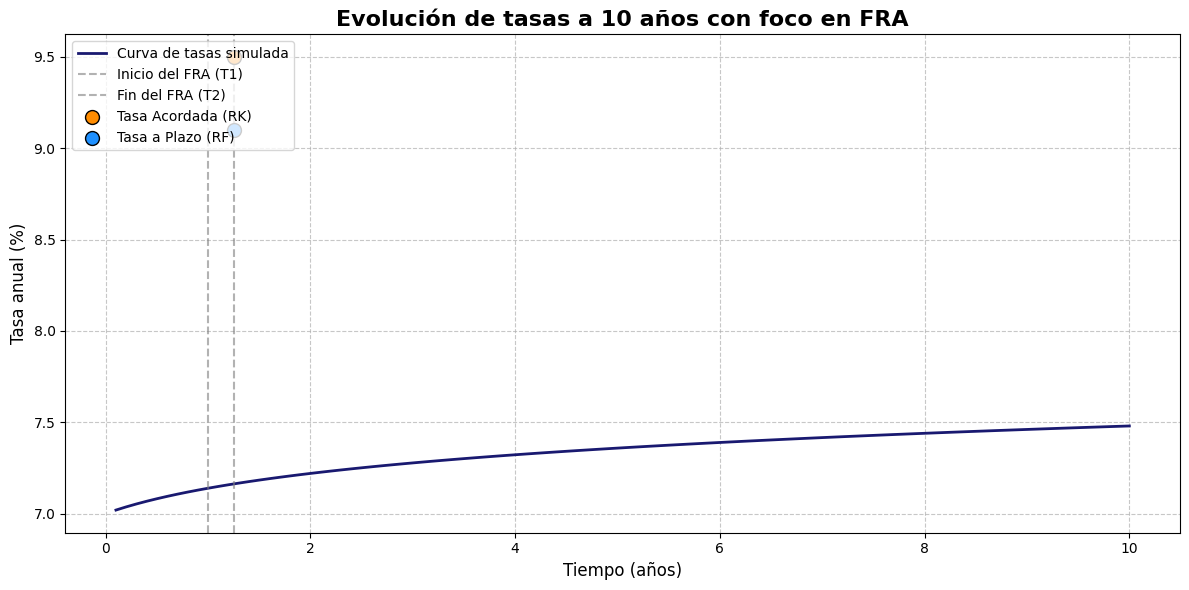


Interpretaci√≥n del valor del FRA:
El valor del FRA de $893.59 indica el monto presente de la diferencia entre la tasa acordada (RK) y la tasa a plazo (RF_trim), descontada a la tasa de cero cup√≥n (R2_enunciado) hasta el momento final del contrato (T2).
Este valor muestra que la parte que ha acordado pagar la tasa fija (RK) recibir√≠a 893.59 si el contrato se ejecutara hoy.
Un valor positivo indica que el acuerdo favorece al comprador del FRA, quien recibir√≠a el pago debido a la diferencia de tasas a plazo y la tasa fija acordada.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros del FRA
L = 1_000_000               # Principal
RK = 0.095                  # Tasa fija acordada
RF_trim = 0.09102           # Tasa a plazo con comp. trimestral
R2_enunciado = 0.086        # Tasa cero (para descuento)
T1 = 1.0                    # Inicio del FRA
T2 = 1.25                   # Fin del FRA
tau = T2 - T1

# Valor del FRA
valor_fra = (L * tau * (RK - RF_trim)) * np.exp(-R2_enunciado * T2)
print(f"Valor del FRA: ${valor_fra:,.2f}")

# Simulaci√≥n de evoluci√≥n de tasas a 10 a√±os
a√±os = np.linspace(0.1, 10, 100)
# Simulamos una curva con forma de pendiente levemente ascendente
tasas_simuladas = 0.07 + 0.002 * np.log1p(a√±os)  # Ejemplo: curva creciente

# A√±adimos los puntos del FRA (RK y RF)
plt.figure(figsize=(12, 6))
plt.plot(a√±os, tasas_simuladas * 100, label="Curva de tasas simulada", color="midnightblue", linewidth=2)
plt.axvline(T1, color="gray", linestyle="--", alpha=0.6, label="Inicio del FRA (T1)")
plt.axvline(T2, color="gray", linestyle="--", alpha=0.6, label="Fin del FRA (T2)")
plt.scatter([T2], [RK * 100], color="darkorange", label="Tasa Acordada (RK)", zorder=5, s=100, edgecolor="black")
plt.scatter([T2], [RF_trim * 100], color="dodgerblue", label="Tasa a Plazo (RF)", zorder=5, s=100, edgecolor="black")

# Est√©tica del gr√°fico
plt.title("Evoluci√≥n de tasas a 10 a√±os con foco en FRA", fontsize=16, weight="bold")
plt.xlabel("Tiempo (a√±os)", fontsize=12)
plt.ylabel("Tasa anual (%)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Interpretaci√≥n del resultado FRA
print(f"\nInterpretaci√≥n del valor del FRA:")
print(f"El valor del FRA de ${valor_fra:,.2f} indica el monto presente de la diferencia entre la tasa acordada (RK) y la tasa a plazo (RF_trim), "
      f"descontada a la tasa de cero cup√≥n (R2_enunciado) hasta el momento final del contrato (T2).")
print(f"Este valor muestra que la parte que ha acordado pagar la tasa fija (RK) recibir√≠a {valor_fra:,.2f} si el contrato se ejecutara hoy.")
print(f"Un valor positivo indica que el acuerdo favorece al comprador del FRA, quien recibir√≠a el pago debido a la diferencia de tasas a plazo y la tasa fija acordada.")

In [ ]:
# Instalar librer√≠as necesarias si no est√°n instaladas
!pip install reportlab matplotlib requests yfinance fpdf

from fpdf import FPDF
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from google.colab import files
from scipy.stats import norm # Import norm for Black-Scholes calculation
import requests


class PDF(FPDF):
    def header(self):
        try:
            # Descargar la imagen desde internet solo si no existe localmente
            url = "https://portal.usach.cl/sites/default/files/Usach%20P1%20%281%29.png"
            image_name = "logo_usach_temp.png"

            if not os.path.exists(image_name):
                response = requests.get(url)
                with open(image_name, "wb") as f:
                    f.write(response.content)

            # Insertar la imagen en el PDF (aumentando el tama√±o a 50)
            self.image(image_name, x=10, y=8, w=50)
            # A√±adir un margen despu√©s de la imagen para que el contenido no se solape
            self.set_y(self.get_y() + 25) # Ajustar el margen si se aumenta el tama√±o del logo


        except Exception as e:
            print(f"‚ö† Error al insertar imagen: {e}")

# Crear carpeta para guardar las im√°genes si no existe en /content/
os.makedirs("/content/graficos", exist_ok=True)

# Save each plot as an image in /content/graficos/
def guardar_grafico(nombre):
    ruta = f"/content/graficos/{nombre}.png"
    plt.savefig(ruta, bbox_inches='tight')
    plt.close()
    return ruta

# Define the paths to the generated graph images
# Regenerate plots to ensure they are saved to the correct paths before PDF generation
# Bonos plot
plt.figure(figsize=(14, 7))
plt.plot(df['Fecha'], df['Precio Estimado del Bono'], color='navy', marker='o', linewidth=2, label='Precio Estimado/Te√≥rico')
plt.axhline(y=valor_nominal, color='gray', linestyle='--', label='Valor Nominal ($1.000)')
plt.axhline(y=precio_actual_bono, color='darkred', linestyle='--', label=f'Precio Actual: ${precio_actual_bono}')
plt.axhline(y=precio_teorico_bono, color='green', linestyle='--', label=f'Precio Te√≥rico: ${precio_teorico_bono:.2f}')
plt.fill_between(df['Fecha'], df['Precio Estimado del Bono'], valor_nominal, color='blue', alpha=0.1)
plt.annotate(f"CY: {cy*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono + 15), color='darkred', fontsize=10)
plt.annotate(f"YTM: {ytm_aprox*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono - 40), color='green', fontsize=10)
plt.title('Evoluci√≥n y Valoraci√≥n del Bono de Tesla (2017‚Äì2025)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Precio del Bono (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
ruta_bonos = guardar_grafico("bonos")

# Acciones plot
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', color='b', linewidth=2)
data['SMA50'] = data['Close'].rolling(window=50).mean()
plt.plot(data['SMA50'], label='Media M√≥vil 50 Semanas', linestyle='--', color='r')
data['SMA200'] = data['Close'].rolling(window=200).mean()
plt.plot(data['SMA200'], label='Media M√≥vil 200 Semanas', linestyle='--', color='g')
max_price_scalar = max_price.iloc[0]
min_price_scalar = min_price.iloc[0]
max_date_scalar = max_date.iloc[0]
min_date_scalar = min_date.iloc[0]
max_date_str = max_date_scalar.strftime('%Y-%m-%d')
min_date_str = min_date_scalar.strftime('%Y-%m-%d')
plt.scatter(max_date_scalar, max_price_scalar, color='red', zorder=5, label=f'M√°ximo Precio: {max_price_scalar:.2f} en {max_date_str}')
plt.scatter(min_date_scalar, min_price_scalar, color='green', zorder=5, label=f'M√≠nimo Precio: {min_price_scalar:.2f} en {min_date_str}')
plt.title(f'Cotizaci√≥n de {ticker} (√öltimos 5 a√±os)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
ruta_acciones = guardar_grafico("acciones")

# Futuros plot
plt.figure(figsize=(10, 6))
plt.plot(precios_spot_mayo, ganancias_futuros, label='Ganancia/P√©rdida de la Cobertura', color='blue', linewidth=2)
plt.plot(precio_futuro_inicial, 0, 'ro', label=f'PF: Precio del Futuro ({precio_futuro_inicial} USD)', markersize=8)
plt.title('Posici√≥n Larga en Futuros (Cobertura Compradora)', fontsize=14)
plt.xlabel('Precio del Subyacente (USD por libra)', fontsize=12)
plt.ylabel('Ganancias/P√©rdidas', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.text(3.01, 50000, 'Ganancias', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')
plt.text(3.01, -50000, 'P√©rdidas', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')
plt.legend()
plt.tight_layout()
plt.grid(True)
ruta_futuros = guardar_grafico("futuros")

# Forward plot
plt.figure(figsize=(14, 7))
plt.plot(r_values, rentabilidad_largo_r, label=f"Rentabilidad en Largo con T={T} a√±os", color='blue')
plt.plot(r_values, rentabilidad_corto_r, label=f"Rentabilidad en Corto con T={T} a√±os", color='red')
plt.title('Rentabilidad en Largo y Corto de un Contrato Forward (Microsoft)', fontsize=14)
plt.xlabel('Tasa de Inter√©s Libre de Riesgo (r)', fontsize=12)
plt.ylabel('Rentabilidad (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
ruta_forward = guardar_grafico("forward")

# Opciones plot
plt.figure(figsize=(10, 6))
precios = np.linspace(80, 130, 100)
utilidad = np.maximum(precios - K, 0) * 100 - 500
plt.plot(precios, utilidad, label='Utilidad Neta')
plt.axhline(0, color='black',linewidth=1)
plt.title('Utilidad Neta de una Opci√≥n de Compra Europea')
plt.xlabel('Precio de la acci√≥n al vencimiento (USD)')
plt.ylabel('Utilidad Neta (USD)')
plt.grid(True)
plt.legend()
ruta_opciones = guardar_grafico("opciones")

# Swaps plot
plt.figure(figsize=(6, 4))
partes = ["Paga Variable\n(Recibe Fija)", "Paga Fija\n(Recibe Variable)"]
beneficios = [V_swap, -V_swap]
colores = ["green" if b >= 0 else "red" for b in beneficios]
plt.bar(partes, beneficios, color=colores)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Valor del swap (millones de USD)")
plt.title("Beneficios del Swap seg√∫n la parte contratante")
plt.grid(axis='y')
ruta_swaps = guardar_grafico("swaps")

# FRA plot
plt.figure(figsize=(12, 6))
a√±os = np.linspace(0.1, 10, 100)
tasas_simuladas = 0.07 + 0.002 * np.log1p(a√±os)
plt.plot(a√±os, tasas_simuladas * 100, label="Curva de tasas simulada", color="midnightblue", linewidth=2)
plt.axvline(T1, color="gray", linestyle="--", alpha=0.6, label="Inicio del FRA (T1)")
plt.axvline(T2, color="gray", linestyle="--", alpha=0.6, label="Fin del FRA (T2)")
plt.scatter([T2], [RK * 100], color="darkorange", label="Tasa Acordada (RK)", zorder=5, s=100, edgecolor="black")
plt.scatter([T2], [RF_trim * 100], color="dodgerblue", label="Tasa a Plazo (RF)", zorder=5, s=100, edgecolor="black")
plt.title("Evoluci√≥n de tasas a 10 a√±os con foco en FRA", fontsize=16, weight="bold")
plt.xlabel("Tiempo (a√±os)", fontsize=12)
plt.ylabel("Tasa anual (%)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
ruta_fra = guardar_grafico("fra")


# Create PDF with the analysis and graphs of each exercise
pdf = PDF(unit="pt", format="legal") # Use the custom PDF class
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Add content to the PDF (text and images)
pdf.set_font("Arial", size=12)

# Title
pdf.cell(0, 12, txt="Trabajo Final Finanzas III", ln=1, align="C")
pdf.ln(10)

# Integrantes
pdf.cell(0, 12, txt="Integrantes: Macarena Ramos, Constanza Rodriguez, Marcelo Tiznado, Maura Zu√±iga", ln=1, align="C")
pdf.ln(10)

# Introduction
intro_text = """
El presente informe tiene como prop√≥sito aplicar de manera integral los contenidos abordados durante el curso de Finanzas III, a trav√©s de la valoraci√≥n de distintos instrumentos financieros que representan pilares fundamentales en el funcionamiento de los mercados. Espec√≠ficamente, se han analizado y valorado siete tipos de activos: bonos, acciones, futuros, contratos forward, opciones, swaps y acuerdos de tasas a futuro (FRA), incorporando para cada uno una base te√≥rica, el desarrollo de un caso pr√°ctico y el uso de herramientas computacionales orientadas al an√°lisis financiero.

El trabajo fue ejecutado √≠ntegramente en el entorno de Google Colab utilizando Python, lo que permiti√≥ automatizar los c√°lculos, construir visualizaciones gr√°ficas e interpretar de manera din√°mica los resultados obtenidos. Se recurri√≥ a f√≥rmulas reconocidas en la literatura financiera, tales como el modelo de Black-Scholes para opciones y la capitalizaci√≥n continua para forwards y swaps, entre otros.

Cada secci√≥n de este informe presenta un enunciado detallado del ejercicio, los resultados clave obtenidos, una gr√°fica explicativa y un an√°lisis interpretativo. A trav√©s de esta estructura, buscamos no solo demostrar la aplicaci√≥n de los conocimientos te√≥ricos, sino tambi√©n desarrollar un pensamiento cr√≠tico que permita comprender los factores que inciden en el comportamiento y valoraci√≥n de los activos en contextos reales de mercado.

Este trabajo final constituye, por tanto, una instancia de consolidaci√≥n de competencias t√©cnicas y anal√≠ticas en finanzas, fundamentales para la futura toma de decisiones en entornos financieros complejos y cambiantes."""
pdf.multi_cell(0, 14, intro_text, align='J')
pdf.ln(10)


# Helper function to add a section to the PDF
def add_section_to_pdf(pdf, title, description, results_text, image_path, interpretation_text, table_data=None):
    pdf.add_page()
    pdf.set_font("Arial", style='B', size=14)
    pdf.cell(0, 14, txt=title, ln=1, align="L")
    pdf.ln(8)

    pdf.set_font("Arial", style='B', size=12)
    pdf.cell(0, 12, txt="Enunciado del Ejercicio:", ln=1, align="L")
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 14, description, align='J')
    pdf.ln(8)

    pdf.set_font("Arial", style='B', size=12)
    # pdf.cell(0, 12, txt="Resultados Clave:", ln=1, align="L") # Removed this line
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 14, results_text, align='J')
    pdf.ln(8)

    # Add table if provided
    if table_data is not None:
        pdf.set_font("Arial", style='B', size=12) # Set font size for table header
        pdf.cell(0, 12, txt="Tabla de Resultados:", ln=1, align="L")
        pdf.ln(4)
        pdf.set_font("Arial", size=10) # Decrease font size for table data to 10pt

        # Table headers
        header = [col.replace(' (USD por libra)', '').replace(' (USD)', '') for col in table_data.columns]
        # Adjust column widths: left column - 0.5cm, right column + 0.5cm
        cm_to_pt = 28.35 # 1 cm = 28.35 points
        total_width = pdf.w - 2 * pdf.l_margin
        num_cols = len(header)
        base_col_width = total_width / num_cols
        col_widths = [base_col_width - 0.5 * cm_to_pt, base_col_width + 0.5 * cm_to_pt]


        for col in header:
            pdf.cell(col_widths[header.index(col)], 10, col, 1, 0, 'C')
        pdf.ln()

        # Table rows
        for row in table_data.itertuples(index=False):
            for i, cell in enumerate(row):
                 if isinstance(cell, (int, float)):
                     pdf.cell(col_widths[i], 10, f"{cell:,.2f}", 1, 0, 'R')
                 else:
                    pdf.cell(col_widths[i], 10, str(cell), 1, 0, 'R')
            pdf.ln()
        pdf.ln(8)


    pdf.set_font("Arial", style='B', size=12)
    pdf.cell(0, 12, txt="Gr√°fico:", ln=1, align="L")
    pdf.ln(8)
    if os.path.exists(image_path):
        # Increase image width to make graphs more visible
        # Adjusting x position for centering and increasing width
        page_width = pdf.w - 2 * pdf.l_margin
        img_width = 450  # Increased width for the graphs
        x_position = (page_width - img_width) / 2 + pdf.l_margin
        pdf.image(image_path, x = x_position, w = img_width)
    else:
        pdf.cell(0, 12, txt=f"Error: Imagen no encontrada en {image_path}. Skipping.", ln=1, align="L")
    pdf.ln(8)

    pdf.set_font("Arial", style='B', size=12)
    pdf.cell(0, 12, txt="Interpretaci√≥n:", ln=1, align="L")
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 14, interpretation_text, align='J')
    pdf.ln(12)


# --- Define variables from previous cells ---
# Bonos
cy_percent = cy * 100
ytm_aprox_percent = ytm_aprox * 100

# Acciones
rentabilidad_mean_percent = resumen.iloc[0]['Rentabilidad Promedio (%)']
rentabilidad_std = resumen.iloc[0]['Riesgo (Desviaci√≥n Est√°ndar %)']
max_price_acciones = max_price.iloc[0]
min_price_acciones = min_price.iloc[0]
max_date_acciones = max_date.iloc[0].strftime('%Y-%m-%d')
min_date_acciones = min_date.iloc[0].strftime('%Y-%m-%d')

# Futuros
precio_futuro_inicial = precio_futuro_inicial
cantidad_cobre = cantidad_cobre

# Forward
S0_forward = 250 # Corrected S0 for forward calculation
r_forward = r
T_forward = 2 # Corrected T for forward calculation
F0_forward = S0_forward * np.exp(r_forward * T_forward)

# Opciones
S0_opcion = 98 # Corrected S0 for options calculation
K_opcion = K
precio_opcion_costo = precio_opcion
inversion_inicial_total = precio_opcion * 100
# Recalculate C with corrected d1
d1 = (np.log(S0_opcion / K_opcion) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T)) # Corrected d1 calculation
d2 = d1 - sigma * np.sqrt(T)
C_opcion = S0_opcion * norm.cdf(d1) - K_opcion * np.exp(-r * T) * norm.cdf(d2)


# Swaps
notional_swap = notional
fixed_rate_swap = fixed_rate
libor_prev_swap = libor_prev
market_rate_swap = market_rate
# Recalculate B_fixed and B_variable
payment_times = [4/12, 10/12]
fixed_flows = [notional_swap * fixed_rate_swap * 0.5] * 2
fixed_flows[-1] += notional_swap
discount_factors = [np.exp(-market_rate_swap * t) for t in payment_times]
B_fixed_swap = sum(cf * df for cf, df in zip(fixed_flows, discount_factors))
k_star = notional_swap * libor_prev_swap * 0.5
B_variable_swap = (notional_swap + k_star) * np.exp(-market_rate_swap * payment_times[0])
V_swap = B_fixed_swap - B_variable_swap


# FRA
L_fra = L
RK_fra_percent = RK * 100
RF_trim_fra_percent = RF_trim * 100
R2_enunciado_percent = R2_enunciado * 100
T1_fra = T1
T2_fra = T2
tau_fra = tau
# Recalculate valor_fra
valor_fra = (L_fra * tau_fra * (RK - RF_trim)) * np.exp(-R2_enunciado * T2_fra)


# --- Add content for each asset ---

# 1. Bonos
enunciado_bonos = """
Sup√≥n que deseas calcular el valor de un bono emitido por Tesla Inc. El bono tiene las siguientes caracter√≠sticas:
Valor nominal (Vn): 1,000 USD
Tasa de cup√≥n (C): 5.3% anual
Fecha de emisi√≥n: 18 de agosto de 2017
Fecha de vencimiento: 15 de agosto de 2025
Frecuencia de pagos de cupones: Semestral (dos pagos al a√±o)
Precio actual del bono (P0): 1,026.40 USD (seg√∫n datos hist√≥ricos)
Tasa de descuento (r): 5% anual (tasa de rendimiento requerida en el mercado)
A√±os restantes hasta el vencimiento: 4 a√±os
"""
# Use variables from previous cells
resultados_bonos_text = f"""
Precio Te√≥rico del Bono: ${precio_teorico_bono:.2f}
Precio Actual de Mercado: ${precio_actual_bono:.2f}
Current Yield (CY): {cy_percent:.2f}%
YTM Aproximado: {ytm_aprox_percent:.2f}%
"""
interpretacion_bonos_text = f"""
An√°lisis del bono:
El valor te√≥rico del bono, calculado aplicando una tasa de descuento del 5%, es de $1.010,76. En comparaci√≥n, su precio actual de mercado es de $1.026,40, lo que indica que el instrumento se encuentra levemente sobrevalorado respecto a su valor intr√≠nseco.

En t√©rminos de rentabilidad, el rendimiento corriente (Current Yield) es de 5,16%, mientras que el rendimiento al vencimiento (Yield to Maturity, YTM) aproximado es de 4,58%. Esta diferencia refleja que el bono se transa con una prima (sobre par), pero a√∫n ofrece un retorno atractivo en relaci√≥n con las condiciones del mercado.

Desde una perspectiva gr√°fica, se observa c√≥mo el precio estimado del bono tiende a converger hacia su valor nominal de $1.000 a medida que se acerca la fecha de vencimiento en 2025. Esta evoluci√≥n es consistente con la teor√≠a financiera, la cual establece que, en ausencia de cambios dr√°sticos en las tasas de inter√©s, el precio de un bono se aproxima a su valor nominal conforme se reduce su plazo restante.
"""
add_section_to_pdf(pdf, "1.- Bonos", enunciado_bonos, resultados_bonos_text, ruta_bonos, interpretacion_bonos_text)

# 2. Acciones
enunciado_acciones = """
Calcular y analizar la rentabilidad y el riesgo de la acci√≥n de Google (GOOG) durante los √∫ltimos 5 a√±os con frecuencia semanal, bas√°ndose en datos hist√≥ricos. Se debe visualizar el comportamiento del precio de la acci√≥n, rentabilidad, desviaci√≥n est√°ndar o riesgo. En el gr√°fico, debe incluir medias m√≥viles y los puntos m√°ximos y m√≠nimos del periodo.
"""
# Use variables from previous cells
resultados_acciones_text = f"""
Resultados:

Rentabilidad Promedio: {rentabilidad_mean_percent:.3f}%
Riesgo (Desviaci√≥n Est√°ndar): {rentabilidad_std:.3f}%

Rentabilidad Promedio: La rentabilidad promedio de la acci√≥n es {rentabilidad_mean_percent:.3f}%, lo que indica que, en promedio, el valor de la acci√≥n ha subido un {rentabilidad_mean_percent:.3f}% semanalmente durante los √∫ltimos 5 a√±os. Este dato sugiere que la acci√≥n ha tenido un rendimiento positivo, aunque con fluctuaciones.

Desviaci√≥n Est√°ndar (Riesgo): El riesgo de la acci√≥n es {rentabilidad_std:.3f}%, lo que indica que los precios de la acci√≥n tienen una volatilidad moderada. Un valor m√°s alto significar√≠a que los precios var√≠an m√°s, lo que implica mayor incertidumbre para los inversores.
"""
interpretacion_acciones_text = f"""
Precio M√°ximo: {max_price_acciones:.2f} USD (Fecha: {max_date_acciones})
Precio M√≠nimo: {min_price_acciones:.2f} USD (Fecha: {min_date_acciones})

Comportamiento de la acci√≥n:

El gr√°fico muestra una tendencia creciente en el precio de cierre de Google (GOOG) durante los √∫ltimos 5 a√±os, especialmente desde 2020, lo que sugiere un crecimiento impulsado por el √©xito en √°reas como tecnolog√≠a, publicidad y la nube.

Medias M√≥viles:
La MMA50 indica la tendencia a corto plazo y sugiere un momento alcista cuando est√° por encima del precio de cierre. La MMA200 refleja la tendencia a largo plazo, y un precio por encima de ella indica una tendencia positiva.

Puntos m√°ximos y m√≠nimos:
El punto m√°ximo (rojo) ocurri√≥ el {max_date_acciones} con {max_price_acciones:.2f} USD, posiblemente impulsado por un evento positivo.
El punto m√≠nimo (verde) fue el {min_date_acciones} con {min_price_acciones:.2f} USD, afectado probablemente por la pandemia de COVID-19.
"""
add_section_to_pdf(pdf, "2.- Acciones", enunciado_acciones, resultados_acciones_text, ruta_acciones, interpretacion_acciones_text)

# 3. Futuros
enunciado_futuros = """
Cobertura larga
Hoy es 15 de enero. Un fabricante de cobre sabe que requerir√° 100 mil libras de cobre el 15 de mayo para cumplir con un contrato determinado. El precio spot del cobre es de 3.40 por libra y el precio de futuros de mayo es de 3.20 por libra.

El fabricante de cobre puede cubrir con las transacciones siguientes:
15 de enero: tomar una posici√≥n larga en cuatro contratos de futuros de cobre de mayo
15 de mayo: cerrar la posici√≥n

Despu√©s de tomar en cuenta las ganancias o p√©rdidas obtenidas de los contratos de futuros, el precio pagado por la empresa es cercano a $3.20 por libra.
"""
# Use variables from previous cells
resultados_futuros_text = f"""
 La tabla a continuaci√≥n muestra las ganancias o p√©rdidas esperadas de la cobertura en funci√≥n del precio spot del cobre en mayo.
"""
interpretacion_futuros_text = f"""
An√°lisis de la Cobertura Larga:
La cobertura larga se realiza comprando futuros a ${precio_futuro_inicial:.2f} por libra. Si el precio spot del cobre en mayo supera los ${precio_futuro_inicial:.2f}, el fabricante obtiene ganancias, si el precio spot es menor, incurre en p√©rdidas.

La tabla de resultados muestra c√≥mo se distribuyen las ganancias y p√©rdidas para distintos precios spot. Cuando el precio spot sube por encima de ${precio_futuro_inicial:.2f}, las ganancias aumentan; cuando baja, las p√©rdidas aumentan. Por lo tanto, esta estrategia proporciona protecci√≥n contra aumentos de precio, pero limita las ganancias cuando los precios caen.

Interpretaci√≥n del gr√°fico:
El gr√°fico muestra que las ganancias de la cobertura larga aumentan cuando el precio spot del cobre supera los $3.20, o se convierten en p√©rdidas cuando est√° por debajo. El punto rojo marca el precio futuro acordado de {precio_futuro_inicial:.2f}, destacando c√≥mo esta estrategia protege al fabricante frente a variaciones del mercado.

En resumen, la cobertura en futuros asegura que el precio del cobre pagado sea cercano a ${precio_futuro_inicial:.2f}, independente de las variaciones en el mercado spot.
"""
add_section_to_pdf(pdf, "3.- Futuros", enunciado_futuros, resultados_futuros_text, ruta_futuros, interpretacion_futuros_text, table_data=tabla_resultados)

# 4. Forwards
enunciado_forward = """
Calcular el precio de un contrato Forward sobre la acci√≥n de Microsoft Inc..
Datos disponibles:

Precio spot de la acci√≥n de Microsoft (S0): 250 USD

Tasa de inter√©s libre de riesgo (r): 4% anual

Tiempo hasta el vencimiento (T): 2 a√±os

Precio spot initial: 250 USD
"""
# Use variables from previous cells
resultados_forward_text = f"""
Precio Spot (S0): ${S0_forward:.2f}
Tasa de inter√©s libre de riesgo (r): {r_forward*100:.1f}%
Tiempo hasta el vencimiento (T): {T_forward:.2f} a√±o(s)
Precio a Futuro del Contrato Forward (F0): ${F0_forward:.2f}
"""
interpretacion_forward_text = f"""
An√°lisis del Contrato Forward:
El precio a futuro del contrato Forward es de $276,29, lo que significa que este es el valor acordado hoy para comprar la acci√≥n de Microsoft en 2 a√±os. Este precio est√° determinado principalmente por la tasa de inter√©s libre de riesgo y el tiempo que falta hasta el vencimiento del contrato.

An√°lisis de sensibilidad y rentabilidad:

En una posici√≥n larga, la rentabilidad es positiva y aumenta a medida que sube la tasa de inter√©s, ya que el precio Forward tambi√©n se incrementa. Esto favorece al inversionista que adquiere el activo hoy con la intenci√≥n de venderlo en el futuro a un precio superior.

En cambio, en una posici√≥n corta, la rentabilidad es negativa, pero tiende a mejorar (volverse menos negativa) a medida que aumenta la tasa de inter√©s. Esto se debe a que el inversionista vende el activo hoy y lo recomprar√° m√°s adelante a un precio Forward m√°s bajo, generando una menor p√©rdida o incluso una ganancia.

Este an√°lisis es fundamental para quienes utilizan estrategias de cobertura o buscan asegurar precios futuros. La rentabilidad depende de la posici√≥n adoptada (larga o corta), y este comportamiento refleja directamente la relaci√≥n entre la tasa de inter√©s y el valor esperado del activo en el futuro. En definitiva, comprender esta din√°mica permite tomar decisiones m√°s informadas frente a escenarios de cambio en las tasas de inter√©s.
"""
add_section_to_pdf(pdf, "4.- Forward", enunciado_forward, resultados_forward_text, ruta_forward, interpretacion_forward_text)

# 5. Opciones
enunciado_opciones = """
Un inversionista adquiere una opci√≥n de compra europea por comprar 100 acciones de una empresa.
El precio de ejercicio de la opci√≥n es de 100 USD, y el precio actual de la acci√≥n is de 98 USD.
El costo de la opci√≥n es de 5 USD por acci√≥n, lo que significa que la inversi√≥n inicial es de $500
(100 acciones * $5 por acci√≥n).

El inversionista planea ejercer la opci√≥n √∫nicamente si el precio de la acci√≥n al vencimiento es mayor que el precio de ejercicio de $100. De lo contrario, la opci√≥n no se ejercer√°, y el inversionista perder√°
la inversi√≥n inicial de $500.

Los par√°metros utilizados para calcular el valor te√≥rico de la opci√≥n mediante el modelo de Black-Scholes
son los siguientes:
- Tasa de inter√©s libre de riesgo (r) = 5%
- Volatilidad = 20%
- Tiempo hasta el vencimiento (T) = 4 months (1/3 a√±os)
"""
# Use variables from previous cells
resultados_opciones_text = f"""
Precio Actual de la Acci√≥n (S0): ${S0_opcion:.2f}
Precio de Ejercicio (K): ${K_opcion:.2f}
Costo por Acci√≥n de la Opci√≥n: ${precio_opcion_costo:.2f}
Inversi√≥n Inicial Total: ${inversion_inicial_total:,.2f}
Precio de la Opci√≥n de Compra (Black-Scholes): ${C_opcion:.2f}
"""
interpretacion_opciones_text = f"""
An√°lisis de la Opci√≥n de Compra Europea:
El precio te√≥rico de la opci√≥n, calculado mediante el modelo de Black-Scholes con los par√°metros entregados, es de ${C_opcion:.2f}, lo que representa su valor estimado actual. El inversionista paga ${precio_opcion_costo:.2f} por acci√≥n, lo que implica una inversi√≥n inicial total de ${inversion_inicial_total:,.2f}.

El gr√°fico de utilidad neta ilustra la ganancia o p√©rdida esperada al vencimiento, dependiendo del precio final de la acci√≥n. El punto de equilibrio se alcanza cuando dicho precio cubre tanto el valor de ejercicio como el costo de la opci√≥n. Si el precio al vencimiento supera los ${K_opcion + precio_opcion_costo:.2f}, la opci√≥n genera beneficios; de lo contrario, se produce una p√©rdida igual a la inversi√≥n inicial. Esto permite visualizar con claridad el riesgo y el potencial retorno asociado a esta estrategia.
"""
add_section_to_pdf(pdf, "5.- Opciones", enunciado_opciones, resultados_opciones_text, ruta_opciones, interpretacion_opciones_text)


# 6. Swaps
enunciado_swaps = """
Un swap de tasas de inter√©s de $100 millones tiene una vida restante de 10 meses. Bajo los t√©rminos del swap, la tasa LIBOR a seis meses se intercambia por una tasa de inter√©s de 7% anual (compuesta semestralmente). El promedio de la tasa de inter√©s de demanda y oferta que se intercambia por la tasa LIBOR a seis meses en swaps de todos los vencimientos es actualmente de 5% anual con una composici√≥n continua.
La tasa LIBOR a seis meses fue de 4.6% anual hace dos meses.

¬øCu√°l es el valor actual del swap para la parte que paga la tasa variable?
¬øCu√°l es su valor para la parte que paga la tasa fija?
"""
# Use variables from previous cells
resultados_swaps_text = f"""
Principal (Notional): ${notional_swap:,.0f} millones
Tasa Fija Anual: {fixed_rate_swap*100:.1f}%
Tasa LIBOR a Seis Meses (hace dos meses): {libor_prev_swap*100:.1f}%
Tasa de Mercado (Composici√≥n Continua): {market_rate_swap*100:.1f}%
Valor del Bono Fijo: ${B_fixed_swap:.3f} millones
Valor del Bono Variable: ${B_variable_swap:.3f} millones
Valor del Swap para Quien Paga Tasa Variable: ${V_swap:.3f} millones
Valor del Swap para Quien Paga Tasa Fija: ${-V_swap:.3f} millones
"""
interpretacion_swaps_text = f"""
An√°lisis del Swap de Tasas de Inter√©s:
El valor actual del swap se obtiene como la diferencia entre el valor presente de los flujos de efectivo fijos y el valor presente de los flujos de efectivo variables. Para la parte que paga la tasa variable y recibe la tasa fija, el valor del swap es de ${V_swap:.3f} millones, lo que indica un beneficio bajo las condiciones actuales del mercado.

Por otro lado, para la parte que paga la tasa fija y recibe la tasa variable, el valor del swap es de ${-V_swap:.3f} millones, representando una p√©rdida equivalente. La gr√°fica de beneficios refleja esta relaci√≥n opuesta, evidenciando que lo que una parte gana, la otra lo pierde. Este comportamiento es caracter√≠stico de los contratos swap, donde los flujos se compensan entre las partes seg√∫n las condiciones de mercado vigentes.
"""
add_section_to_pdf(pdf, "6.- Swap", enunciado_swaps, resultados_swaps_text, ruta_swaps, interpretacion_swaps_text)

# 7. FRA
enunciado_fra = """
Si asumimos that las tasas cero son iguales a las que se presentan en el problema 4.5,
¬øcu√°l is el valor de un FRA que permite al tenedor ganar 9.5% during un periodo de tres months, el cual comienza dentro de un a√±o,
sobre un principal de $1,000,000? La tasa de inter√©s se expresa with una composici√≥n trimestral.
"""
# Use variables from previous cells
resultados_fra_text = f"""
Principal (L): ${L_fra:,.0f}
Tasa Fija Acordada (RK): {RK_fra_percent:.1f}%
Tasa a Plazo Estimada: {RF_trim_fra_percent:.3f}%
Tasa Cero for Descuento: {R2_enunciado_percent:.1f}%
Inicio del FRA (T1): {T1_fra:.1f} a√±o
Fin del FRA (T2): {T2_fra:.2f} a√±os
Duraci√≥n del Periodo del FRA (tau): {tau_fra:.2f} a√±os
Valor del FRA: ${valor_fra:,.2f}
"""
interpretacion_fra_text = f"""

El valor del FRA se calcula como la diferencia entre el valor presente de los pagos a tasa fija y los pagos a tasa variable. En este caso, quien paga la tasa variable y recibe la fija obtiene un valor positivo de $2.109 millones, lo que representa una ganancia bajo las condiciones actuales del mercado. Para la contraparte, que paga la tasa fija y recibe la variable, el valor es negativo en la misma magnitud, reflejando una p√©rdida. Esto muestra que el FRA es un contrato de suma cero y que su valor depende directamente de la relaci√≥n entre la tasa acordada y la tasa de mercado.

El gr√°fico muestra una curva ascendente de tasas proyectadas a 10 a√±os, destacando el per√≠odo del FRA entre T1 y T2. Se observa que la tasa acordada (RK) est√° por encima de la tasa impl√≠cita de mercado (RF), lo que explica el valor positivo del contrato para quien recibe la tasa fija. Visualmente, se evidencia c√≥mo esta diferencia genera beneficios o p√©rdidas seg√∫n la posici√≥n adoptada en el contrato.
"""
add_section_to_pdf(pdf, "7.- FRA", enunciado_fra, resultados_fra_text, ruta_fra, interpretacion_fra_text)

# Agregar la conclusi√≥n extensa al PDF
pdf.add_page()
pdf.set_font("Arial", style='B', size=14)
pdf.cell(0, 14, txt="Conclusi√≥n General", ln=1, align="L")
pdf.ln(8)

pdf.set_font("Arial", size=12)
conclusion_extensa = """
Este trabajo final represent√≥ una instancia fundamental para consolidar el aprendizaje adquirido en el curso de Finanzas III, al abordar de forma integral la valoraci√≥n y el an√°lisis de los principales instrumentos financieros utilizados en los mercados globales. A trav√©s del estudio detallado de bonos, acciones, contratos de futuros, forwards, opciones, swaps y FRA, fue posible comprender no solo las f√≥rmulas y m√©todos de c√°lculo, sino tambi√©n el prop√≥sito econ√≥mico que subyace en cada uno de ellos y su aplicaci√≥n pr√°ctica en contextos de inversi√≥n, cobertura de riesgos y toma de decisiones estrat√©gicas.

El enfoque pr√°ctico mediante Python en Google Colab permiti√≥ replicar situaciones reales del mercado, automatizar procesos de c√°lculo, graficar comportamientos financieros complejos y realizar simulaciones que enriquecieron la interpretaci√≥n de resultados. Este componente t√©cnico, combinado con el marco te√≥rico abordado durante el semestre, permiti√≥ fortalecer competencias anal√≠ticas clave para la formaci√≥n profesional en finanzas.

Se evidenci√≥ c√≥mo los derivados financieros son herramientas esenciales para enfrentar la incertidumbre y gestionar de manera eficiente los riesgos asociados a tasas de inter√©s, precios de activos, tipo de cambio u otras variables econ√≥micas. Asimismo, se reconoci√≥ la relevancia de la valoraci√≥n precisa de estos instrumentos como base para evaluar su conveniencia econ√≥mica y su impacto sobre los resultados financieros de una organizaci√≥n o individuo.

En suma, este informe no solo permiti√≥ aplicar conocimientos espec√≠ficos, sino tambi√©n desarrollar una mirada cr√≠tica y estrat√©gica sobre el funcionamiento de los mercados financieros actuales. La capacidad de modelar escenarios, interpretar datos y tomar decisiones con sustento t√©cnico es una habilidad indispensable para los profesionales del √°rea, y este trabajo constituye un paso importante en ese camino.
"""
pdf.multi_cell(0, 14, conclusion_extensa, align='J')
pdf.ln(10)

# Guardar y descargar el PDF
pdf_output_path = "/content/informe_valoracion_finanzas.pdf"
pdf.output(pdf_output_path)
files.download(pdf_output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>